In [1]:
using CSV, Tables, DataFrames
using Plots, LaTeXStrings;

function limpia(Vin)
    Vout = Array{Float64, 1}(undef, sum(.!ismissing.(Vin)));
    
    k = 1
    for each in Vin
        if !ismissing(each)
            try Vout[k] = parse(Float64, each)
            catch err
                Vout[k] = NaN
            end
            k+=1
        end
    end
    return Vout
end

limpia (generic function with 1 method)

In [2]:
datos = CSV.read("../data/efed1e10-992e-4366-83ef-e3f530255b89_Data.csv", delim = ',');
yrs = vcat(1990, 2000, collect(2008:2016))

11-element Array{Int64,1}:
 1990
 2000
 2008
 2009
 2010
 2011
 2012
 2013
 2014
 2015
 2016

In [3]:
names(datos)

16-element Array{Symbol,1}:
 Symbol("Series Name")  
 Symbol("Series Code")  
 Symbol("Country Name") 
 Symbol("Country Code") 
 Symbol("1990 [YR1990]")
 Symbol("2000 [YR2000]")
 Symbol("2008 [YR2008]")
 Symbol("2009 [YR2009]")
 Symbol("2010 [YR2010]")
 Symbol("2011 [YR2011]")
 Symbol("2012 [YR2012]")
 Symbol("2013 [YR2013]")
 Symbol("2014 [YR2014]")
 Symbol("2015 [YR2015]")
 Symbol("2016 [YR2016]")
 Symbol("2017 [YR2017]")

## Evolución 1990-2016

In [4]:
raw_nombres = datos[Symbol("Country Code")]
nombres = convert(Array{String, 1}, raw_nombres[.!ismissing.(raw_nombres)])
npaises = findfirst(x -> x == "ZWE", nombres)
paises = nombres[1:npaises]
arg_idx = findall(x -> x == "ARG", paises)[1]

8

In [5]:
arg_row = convert(Array{String, 1}, datos[arg_idx, 5:15])
arg_smr_90_16 = limpia(arg_row);

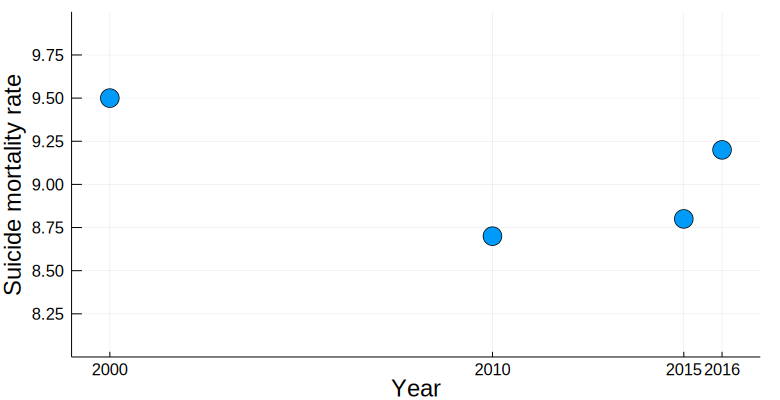

In [6]:
scatter(yrs, arg_smr_90_16,
    xticks = yrs[.!isnan.(arg_smr_90_16)], yticks = 8.25:.25:9.75,  
    xlims = (1999, 2017), ylims = (8., 10),
    legend = false, fillcolor = Colors.colorant"lightskyblue",
    markersize = 10,
    yaxis = "Suicide mortality rate", xaxis = "Year",
    xtickfonthalign = 10, size = (780, 400),
    guidefont = font(16, "Arial"), tickfont = font(11, "Arial"))

## SMR 2016

In [34]:
raw_smr = datos[Symbol("2016 [YR2016]")]
smr_16 = limpia(raw_smr)[1:npaises]
not_nan_smr_16 = .!isnan.(smr_16)
smr_16_cln = smr_16[not_nan_smr_16];

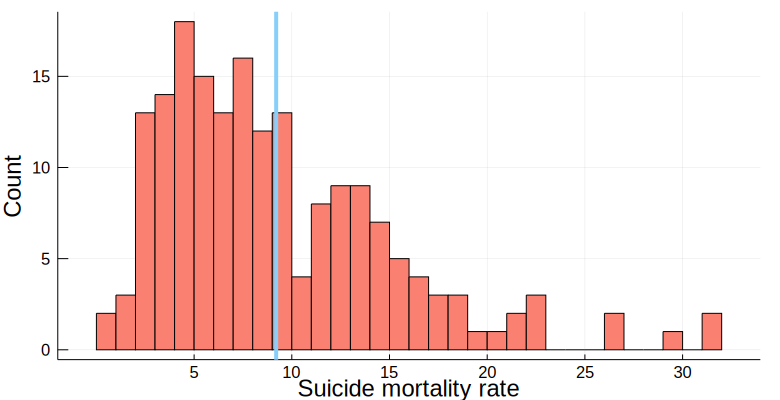

In [37]:
histogram(smr_16_cln, nbins = 30,
    xticks = [ 5 ; 10 ; 15 ; 20 ; 25 ; 30],
    legend = false, fillcolor = "salmon",
    yaxis = "Count", xaxis = "Suicide mortality rate",
    xtickfonthalign = 10, size = (780, 400),
    guidefont = font(16, "Arial"), tickfont = font(11, "Arial"))

vline!([arg_smr_90_16[end]], linecolor = Colors.colorant"lightskyblue", linewidth = 4)
annotate!(arg_smr_90_16[end], 33, text("ARG", 16, :black, :left))

In [38]:
df_smr_16 = DataFrame(Paises = paises[not_nan_smr_16], _16 = smr_16[not_nan_smr_16])


,Paises,_16
,String,Float64
1,AFG,4.7
2,ALB,6.3
3,DZA,3.2
4,AGO,4.7
5,ATG,0.5
6,ARG,9.2
7,ARM,6.6
8,AUS,13.2
9,AUT,15.6


In [42]:
rnk_smr_16 = hcat(df_smr_16, sortperm(df_smr_16, :_16, rev = true))

,Paises,_16,x1
,String,Float64,Int64
1,AFG,4.7,98
2,ALB,6.3,136
3,DZA,3.2,70
4,AGO,4.7,89
5,ATG,0.5,15
6,ARG,9.2,157
7,ARM,6.6,85
8,AUS,13.2,172
9,AUT,15.6,93
